In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(16, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax'),    
])

In [4]:
model.weights[7]

<tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [5]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

CNN_model = Sequential([
#     Conv2D(16, (3, 3), padding='same', activation='relu', strides = 2, input_shape=(1, 28, 28), data_format='channels_first'),
    Conv2D(16, (3, 3), padding='same', activation='relu', strides = 2, input_shape=(28, 28, 1), data_format='channels_last'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),    
])

In [8]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


# Weight and bias initialisers 

In this reading we investigate different ways to initialise weights and biases in the layers of neural networks.

In [9]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
print(tf.__version__)

2.7.0


### Default weights and biases

In the models we have worked with so far, we have not specified the initial values of the weights and biases in each layer of our neural networks.

The default values of the weights and biases in TensorFlow depend on the type of layers we are using. 

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser. 

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$

and $n_{input}$ and $n_{output}$ are the number of inputs to, and outputs from the layer respectively.

### Initialising your own weights and biases
We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

Let's see an example, which uses some of the different initialisations available in Keras.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D 

In [11]:
#Constructing a model

W_B_model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

As the following example illustrates, we can also instantiate initialisers in a slightly different manner, allowing us to set optional arguments of the initialisation method.

In [12]:
#Adding some layers to our model

W_B_model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

W_B_model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

In [13]:
W_B_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 16)           0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 496)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                31808     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                      

In [14]:
W_B_model.weights

[<tf.Variable 'conv1d/kernel:0' shape=(3, 64, 16) dtype=float32, numpy=
 array([[[ 0.03606676, -0.01920233,  0.0057372 , ..., -0.02537967,
           0.0454861 , -0.02172014],
         [-0.04735496,  0.04724631,  0.02154726, ..., -0.0203536 ,
          -0.03992945,  0.01269769],
         [-0.04943019, -0.0045399 ,  0.03880692, ..., -0.00600942,
          -0.00454724,  0.04561896],
         ...,
         [ 0.02379176,  0.00909153, -0.00069437, ...,  0.04867848,
           0.00590174,  0.04685736],
         [ 0.01009323, -0.03482679,  0.01671808, ...,  0.03806807,
          -0.00482255, -0.03159519],
         [ 0.01718472,  0.03330873, -0.00771018, ...,  0.01881993,
          -0.03167695,  0.02148095]],
 
        [[-0.04638118, -0.00928446, -0.0330223 , ..., -0.01776176,
           0.04212632,  0.00170181],
         [ 0.04443837, -0.04615641, -0.01468146, ..., -0.00282853,
          -0.03723166, -0.00478125],
         [-0.03597207, -0.00931479, -0.04805926, ..., -0.02087269,
           0

### Custom weight and bias initialisers
It is also possible to define your own weight and bias initialisers.
Initializers must take in two arguments, the `shape` of the tensor to be initialised, and its `dtype`.

Here is a small example, which also shows how you can use your custom initializer in a layer.

In [15]:
import tensorflow.keras.backend as K

In [16]:
#Example of a custom initializer

def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

W_B_model.add(Dense(64, kernel_initializer=my_init))

In [17]:
W_B_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 16)           0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 496)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                31808     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                      

### Visualising the initialised weights and biases
Finally, we can see the effect of our initialisers on the weights and biases by plotting histograms of the resulting values. Compare these plots with the selected initialisers for each layer above.

In [18]:
import matplotlib.pyplot as plt

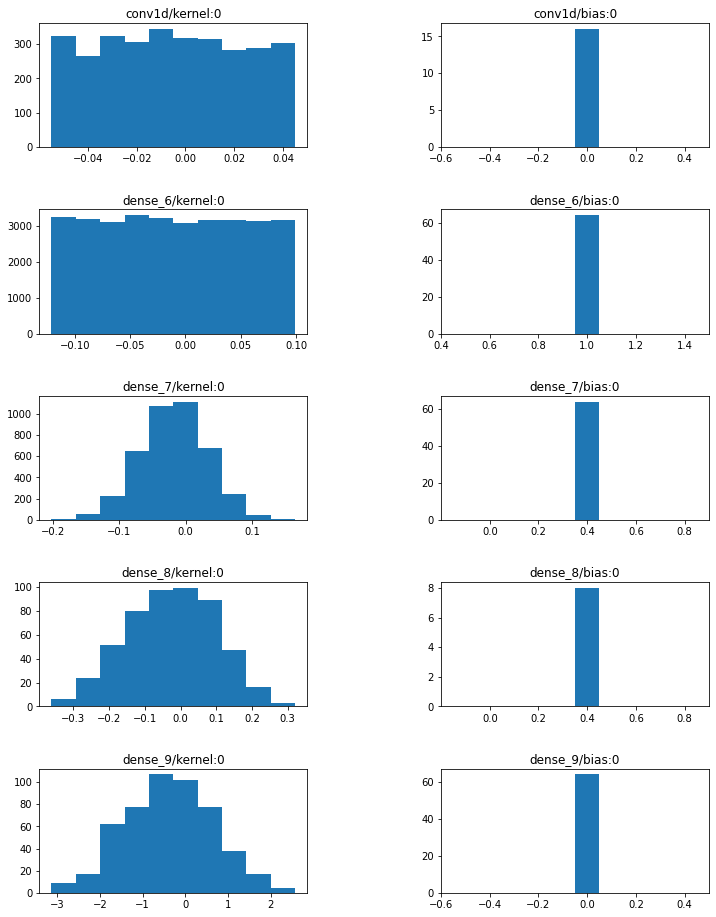

In [19]:
fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in W_B_model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

## Further reading and resources 
* https://keras.io/initializers/
* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/initializers

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [20]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()


model.compile(optimizer = opt, 
              loss = 'sparse_categorical_crossentropy', 
              metrics = [acc, mae])

# 'sparse_categorical_crossentropy'은 y[0]=9, y[1]=0 과 같이 one-hot-encoding이 안되어있는 label일 경우에 사용
# 'categorical_crossentropy'은 y[0]=[0, 0, 0, 0, 0, 0, 0, 0, 1], y[1, 0, 0, 0, 0, 0, 0, 0, 0]과 같이 one-hot-encoding label일 경우에 사용

In [21]:
# Compile the model with multiple metrics
'''
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[mean_pred, "accuracy",tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])
'''

'\ndef mean_pred(y_true, y_pred):\n    return K.mean(y_pred)\n\nmodel.compile(optimizer=\'adam\',\n              loss=\'sparse_categorical_crossentropy\',\n              metrics=[mean_pred, "accuracy",tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])\n'

In [22]:
# Print the resulting model attributes

print(model.optimizer)
print(model.optimizer.lr)
print(model.loss)
print(model.metrics)


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [23]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [24]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [25]:
# Print the shape of the training data

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [26]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

def idx2label(idx):
  print(labels[train_labels[idx]])

idx2label(9)

Sandal


In [27]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

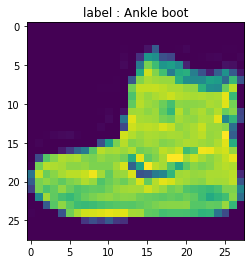

In [28]:
# Display one of the images

plt.imshow(train_images[0])
plt.title(f'label : {labels[train_labels[0]]}')
plt.show()

#### Fit the model

In [29]:
# Fit the model

hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=256 ,verbose=1)

Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.7666 - sparse_categorical_accuracy: 0.7169 - mean_absolute_error: 4.4200 - val_loss: 0.5163 - val_sparse_categorical_accuracy: 0.8186 - val_mean_absolute_error: 4.4200
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4597 - sparse_categorical_accuracy: 0.8401 - mean_absolute_error: 4.4200 - val_loss: 0.4588 - val_sparse_categorical_accuracy: 0.8416 - val_mean_absolute_error: 4.4200
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4120 - sparse_categorical_accuracy: 0.8551 - mean_absolute_error: 4.4200 - val_loss: 0.4437 - val_sparse_categorical_accuracy: 0.8403 - val_mean_absolute_error: 4.4200
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3945 - sparse_categorical_accuracy: 0.8593 - mean_absolute_error: 4.4200 - val_loss: 0.4194 - val_sparse_categorical_accuracy: 0.8508 - val_mean_absolute_error: 4.4200
Epoch 5/5
235/235 [=========

#### Plot training history

In [30]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(hist.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error,val_loss,val_sparse_categorical_accuracy,val_mean_absolute_error
0,0.766613,0.716933,4.420000,0.516329,0.8186,4.42
1,0.459688,0.840100,4.420000,0.458830,0.8416,4.42
2,0.412023,0.855117,4.419999,0.443746,0.8403,4.42
3,0.394507,0.859283,4.420000,0.419435,0.8508,4.42
4,0.389453,0.859033,4.420000,0.419514,0.8492,4.42


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

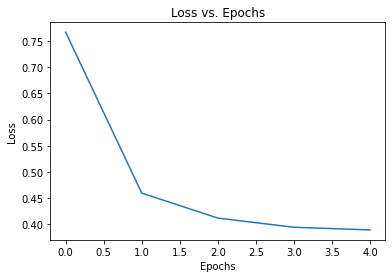

In [31]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

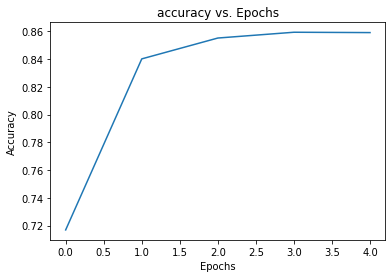

In [32]:
# Make a plot for the accuracy

acc_plot = df.plot(y="sparse_categorical_accuracy", title="accuracy vs. Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

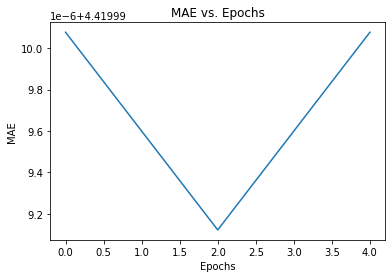

In [33]:
# Make a plot for the additional metric

mae_plot = df.plot(y="mean_absolute_error", title="MAE vs. Epochs", legend=False)
mae_plot.set(xlabel="Epochs", ylabel="MAE")

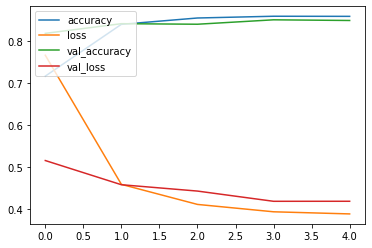

In [34]:
plt.plot(hist.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [35]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [40]:
# Evaluate the model

loss, accuracy, mae = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4195 - sparse_categorical_accuracy: 0.8492 - mean_absolute_error: 4.4200


#### Make predictions from the model

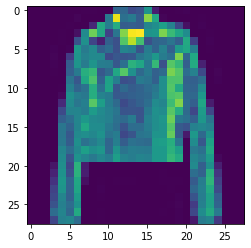

Label: Coat


In [43]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [49]:
# Get the model predictions

# prediction = model.predict(test_image[np.newaxis, ... , np.newaxis])
prediction = model.predict(test_image.reshape(1, 28, 28, 1))
print(prediction)
print(f"Model prediction: {labels[np.argmax(prediction)]}")

[[2.4984439e-04 5.6696199e-06 1.4795172e-01 4.1681928e-05 7.6353252e-01
  2.1540251e-04 8.7940656e-02 3.6308342e-10 6.2516519e-05 6.3027680e-11]]
Model prediction: Coat
